In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import os # interface with underlying OS that python is running on
# CREATE DIRECTORY OF AUDIO FILES
path = "/content/drive/MyDrive/ravdess/ravdess/"
actor_folders = os.listdir(path) #list files in audio directory
actor_folders.sort()
actor_folders[0:5]

['Actor_21', 'Actor_22', 'Actor_23', 'Actor_24', 'Images']

In [ ]:
# importing os module
import os

# Directory
directory = "Wave"
# Path
path = '/content/drive/MyDrive/Wave'
os.mkdir(path)
print("Directory '% s' created" % directory)


In [ ]:
try:
    # creating a folder named Wave
    if not os.path.exists('/content/drive/MyDrive/Wave'):
        os.makedirs('/content/drive/MyDrive/Wave')

# if not created then raise error
except OSError:
    print ('Error: Creating directory of Wave')


# Process Audio Files

## Extract Audio From Video

In [ ]:
import os
inputdir = '/content/drive/MyDrive/ravdess/ravdess/'
outputdir = '/content/drive/MyDrive/Wave'
for filename in os.listdir('/content/drive/MyDrive/ravdess/ravdess/Actor_21'):
    actual_filename = filename[:-4]
    if(filename.endswith(".mp4")):
        os.system('ffmpeg -i {}/{} -acodec pcm_s16le -ar 16000 {}/{}.wav'.format(inputdir, filename, outputdir, actual_filename))
    else:
        continue

## Extract Features And Do Some Process Operations

In [ ]:
def extract_feature(file_name):
    """Function Extracts Features from WAV file"""
    X, sample_rate = librosa.load(file_name)
    stft=np.abs(librosa.stft(X))
    result=np.array([])
    mfccs=np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T,axis=0)
    result=np.hstack((result, mfccs))
    chroma=np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T,axis=0)
    result=np.hstack((result, chroma))
    mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
    result=np.hstack((result, mel))
    return result

In [ ]:
emotions={
  '01':'neutral/calm',
  '02':'happy',
  '03':'sad',
  '04':'angry',
  '05':'fearful',
  '06':'disgust',
  '07':'surprised'
}

def gender(g):
    """Returns Gender Label"""
    if int(g[0:2]) % 2 == 0:
        return 'female'
    else:
        return 'male'

In [ ]:
def load_data(test_size=0.2):
    """Loads Data from directory containing WAV files."""
    x,y=[],[]
    for file in tqdm(glob.glob("data_w_song\\Actor_*\\*.wav")):
        file_name=os.path.basename(file)
        emotion=emotions[file_name.split("-")[2]] + '_' + gender(file_name.split("-")[-1])
        feature=extract_feature(file)
        x.append(feature)
        y.append(emotion)
    return train_test_split(np.array(x), y, test_size=test_size, random_state=9)

In [ ]:
from tqdm import tqdm
import glob
import pandas as pd
import numpy as np
import librosa
import librosa.display

x,y=[],[]
for file in tqdm(glob.glob("/content/drive/MyDrive/Wave/*.wav")):
        file_name=os.path.basename(file)
        emotion=emotions[file_name.split("-")[2]] + '_' + gender(file_name.split("-")[-1])
        feature=extract_feature(file)
        mean = np.mean(feature, axis=0)
        std = np.std(feature, axis=0)
        feature =(feature - mean)/std

        x.append(feature)
        y.append(emotion)

100%|██████████| 10/10 [00:11<00:00,  1.13s/it]


In [ ]:
print(x)
print(y)

[array([-1.32529826e+01,  1.80034398e+00,  7.95289648e-02,  5.94898909e-01,
        1.19141786e-01,  1.10474789e-01,  7.09013730e-02,  1.49062914e-02,
       -1.36793007e-01,  8.61843926e-02,  9.86503044e-02, -1.84123741e-02,
        1.10268350e-01,  8.38261478e-02,  8.77421763e-02,  1.39689049e-02,
        6.23162503e-02,  4.87875368e-02,  9.63537573e-02,  3.70109368e-02,
        1.45853434e-02,  7.00071065e-02, -2.02334171e-04,  1.06274159e-02,
        1.25003480e-02,  3.91032035e-02,  4.20328878e-03,  3.97497295e-02,
        6.44163312e-02,  7.56374772e-02,  5.82302460e-02,  2.13742787e-02,
        3.72111010e-02,  2.67856609e-02,  5.19930283e-02,  3.19869960e-02,
        2.45804315e-02,  2.40483540e-03,  1.80888679e-02,  2.83622049e-02,
        7.79588193e-02,  7.84959186e-02,  7.93505097e-02,  7.92122868e-02,
        7.95605342e-02,  8.03745865e-02,  8.01339573e-02,  8.15845960e-02,
        8.14274363e-02,  8.04246936e-02,  7.98900319e-02,  7.88342883e-02,
        6.43882247e-02, 

# Extract Images From Videos

In [ ]:
# Importing all necessary libraries
import cv2
import os

for i in actor_folders:
    filename = os.listdir(inputdir + i) #iterate over Actor folders
    for file in filename: # go through files in Actor folder
       if file.endswith(".mp4"):
# Read the video from specified path
        cam = cv2.VideoCapture("/content/drive/MyDrive/ravdess/ravdess/" + str(i) + '/' + str(file))

try:

    # creating a folder named data
    if not os.path.exists('Images'):
        os.makedirs('Images')

# if not created then raise error
except OSError:
    print ('Error: Creating directory of images')

# frame
currentframe = 0

while(True):

    # reading from frame
    ret,frame = cam.read()

    if ret:
        # if video is still left continue creating images
        name = './Images/frame' + str(currentframe) + '.jpg'
        print ('Creating...' + name)

        # writing the extracted images
        cv2.imwrite(name, frame)

        # increasing counter so that it will
        # show how many frames are created
        currentframe += 1
    else:
        break

# Release all space and windows once done
cam.release()
cv2.destroyAllWindows()

Creating..../Images/frame0.jpg
Creating..../Images/frame1.jpg
Creating..../Images/frame2.jpg
Creating..../Images/frame3.jpg
Creating..../Images/frame4.jpg
Creating..../Images/frame5.jpg
Creating..../Images/frame6.jpg
Creating..../Images/frame7.jpg
Creating..../Images/frame8.jpg
Creating..../Images/frame9.jpg
Creating..../Images/frame10.jpg
Creating..../Images/frame11.jpg
Creating..../Images/frame12.jpg
Creating..../Images/frame13.jpg
Creating..../Images/frame14.jpg
Creating..../Images/frame15.jpg
Creating..../Images/frame16.jpg
Creating..../Images/frame17.jpg
Creating..../Images/frame18.jpg
Creating..../Images/frame19.jpg
Creating..../Images/frame20.jpg
Creating..../Images/frame21.jpg
Creating..../Images/frame22.jpg
Creating..../Images/frame23.jpg
Creating..../Images/frame24.jpg
Creating..../Images/frame25.jpg
Creating..../Images/frame26.jpg
Creating..../Images/frame27.jpg
Creating..../Images/frame28.jpg
Creating..../Images/frame29.jpg
Creating..../Images/frame30.jpg
Creating..../Image

In [ ]:
import cv2
import numpy as np
import os

def frame_capture(file):
  # Playing video from file:
  cap = cv2.VideoCapture(file)

  try:
      if not os.path.exists('Image'):
          os.makedirs('Image')
  except OSError:
      print('Error: Creating directory of the Image')

  currentFrame = 0

  while(True):
      # Capture frame by frame
      ret, frame = cap.read()

      # Only take the first frame and tenth frame
      if currentFrame == 0:
          # Saves image of the current frame in jpg file
          name = './Image/frame' + str(currentFrame) + '.jpg'
          print ('Creating...' + name)
          cv2.imwrite(name, frame)

      if currentFrame == 6:
          name = './Image/frame' + str(currentFrame) + '.jpg'
          print ('Creating...' + name)
          cv2.imwrite(name, frame)

      # To stop duplicate images
      currentFrame += 1

  cap.release()
  cv2.destroyAllWindows()

In [ ]:
import os
for file in os.listdir("/mydir"):
    if file.endswith(".m4v"):
        path=os.path.join("/mydir", file))
        frame_capture(path)

SyntaxError: ignored

In [ ]:
import cv2
path = '/content/drive/MyDrive/ravdess/ravdess/'
for i in actor_folders:
          p=path.joinpath(i)
          print(p)
          ret,frame = cam.read()




AttributeError: ignored

In [ ]:
try:

    # creating a folder named data
    if not os.path.exists('/content/drive/MyDrive/ravdess/ravdess/Images'):
        os.makedirs('/content/drive/MyDrive/ravdess/ravdess/Images')

# if not created then raise error
except OSError:
    print ('Error: Creating directory of images')


In [ ]:
path = glob.glob("/content/Images/*.jpg")
cv_img = []
for img in path:
    n = cv2.imread(img)
    cv_img.append(n)

Found 1 Faces!


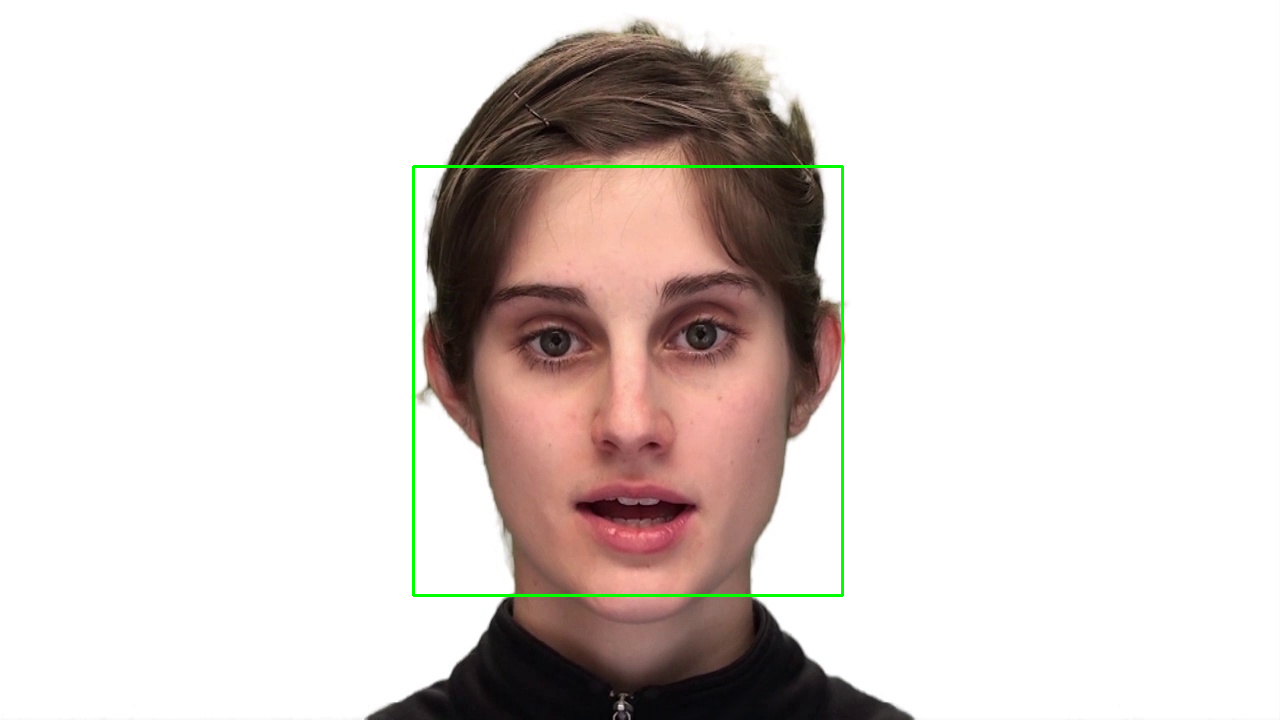

Found 1 Faces!


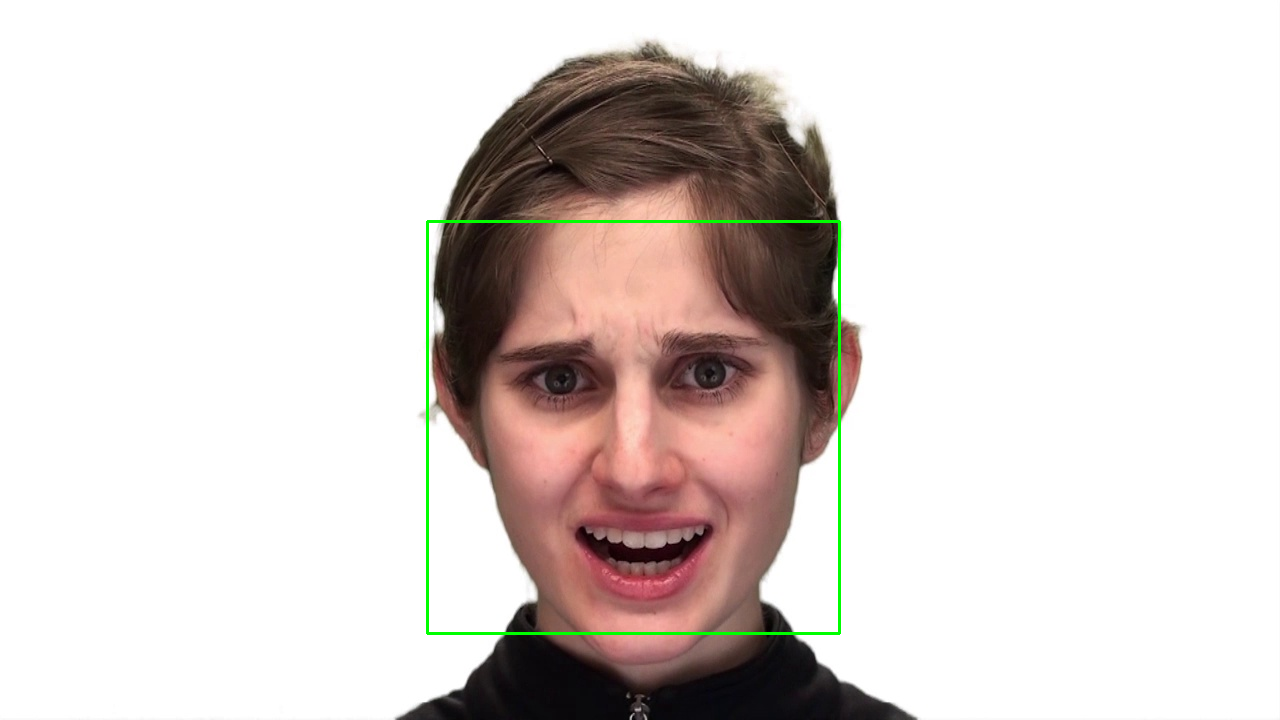

Found 1 Faces!


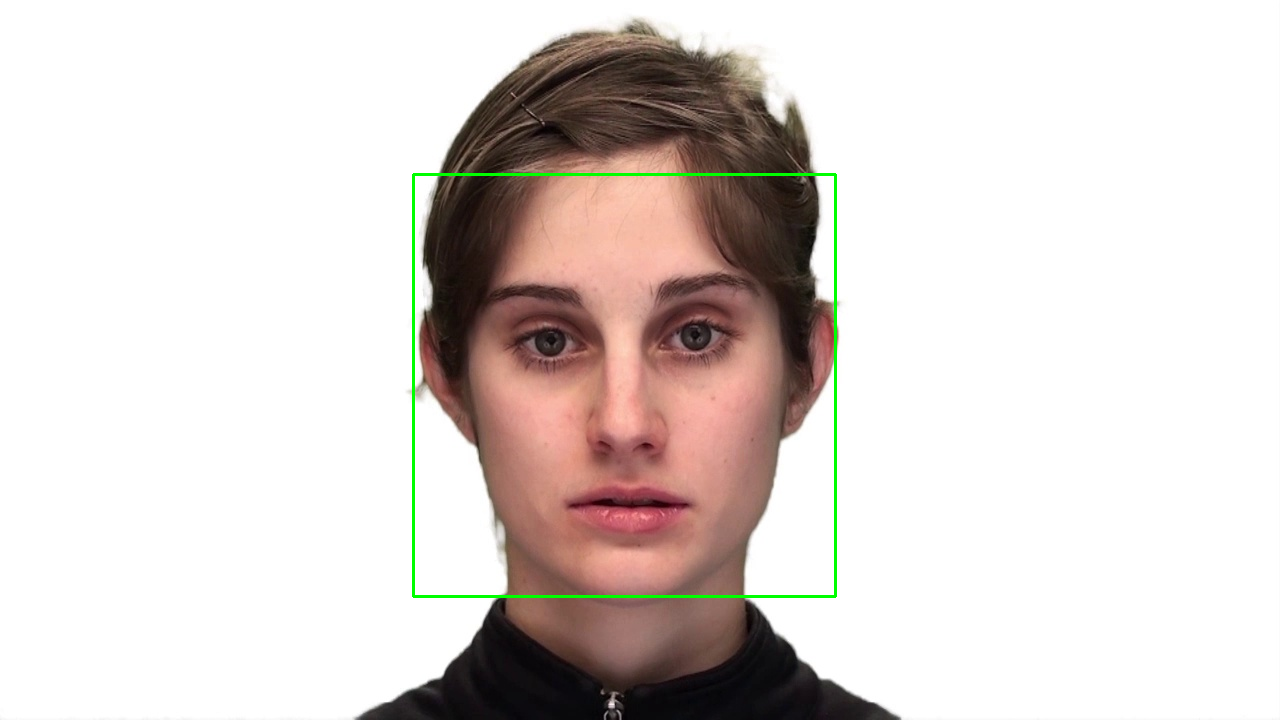

Found 1 Faces!


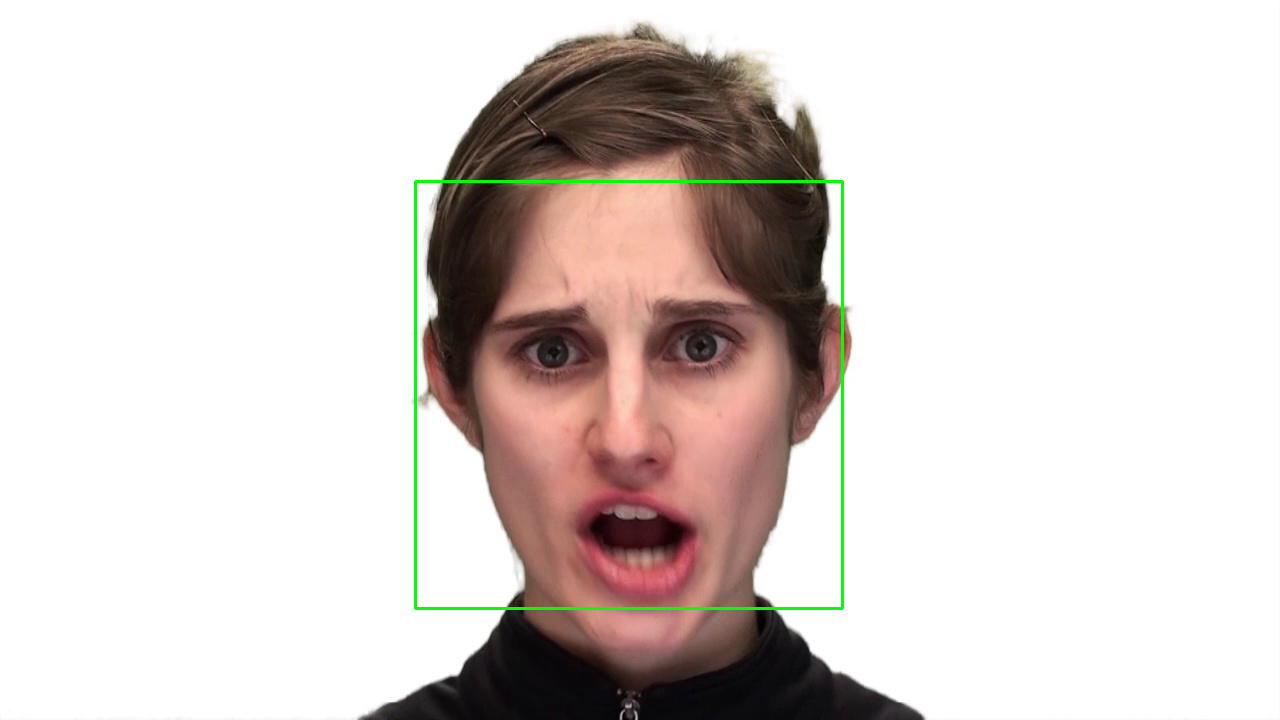

Found 1 Faces!


In [ ]:
ImagePath= glob.glob("/content/Images/*.jpg")
for img in ImagePath:
          #p=path.joinpath(i)
         # print(img)
          #ret,frame = cam.read()
    image = cv2.imread(img)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")
    faces = faceCascade.detectMultiScale(
        gray,
        scaleFactor=1.3,
        minNeighbors=3,
        minSize=(30, 30))
    print("Found {0} Faces!".format(len(faces)))
    for (x, y, w, h) in faces:
         i=cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 2)
         path = '/content/Images/faces'
         cv2.imwrite(os.path.join(path), i)




In [ ]:
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")
faces = faceCascade.detectMultiScale(
        gray,
        scaleFactor=1.3,
        minNeighbors=3,
        minSize=(30, 30)
)

print("Found {0} Faces!".format(len(faces)))

Found 1 Faces!


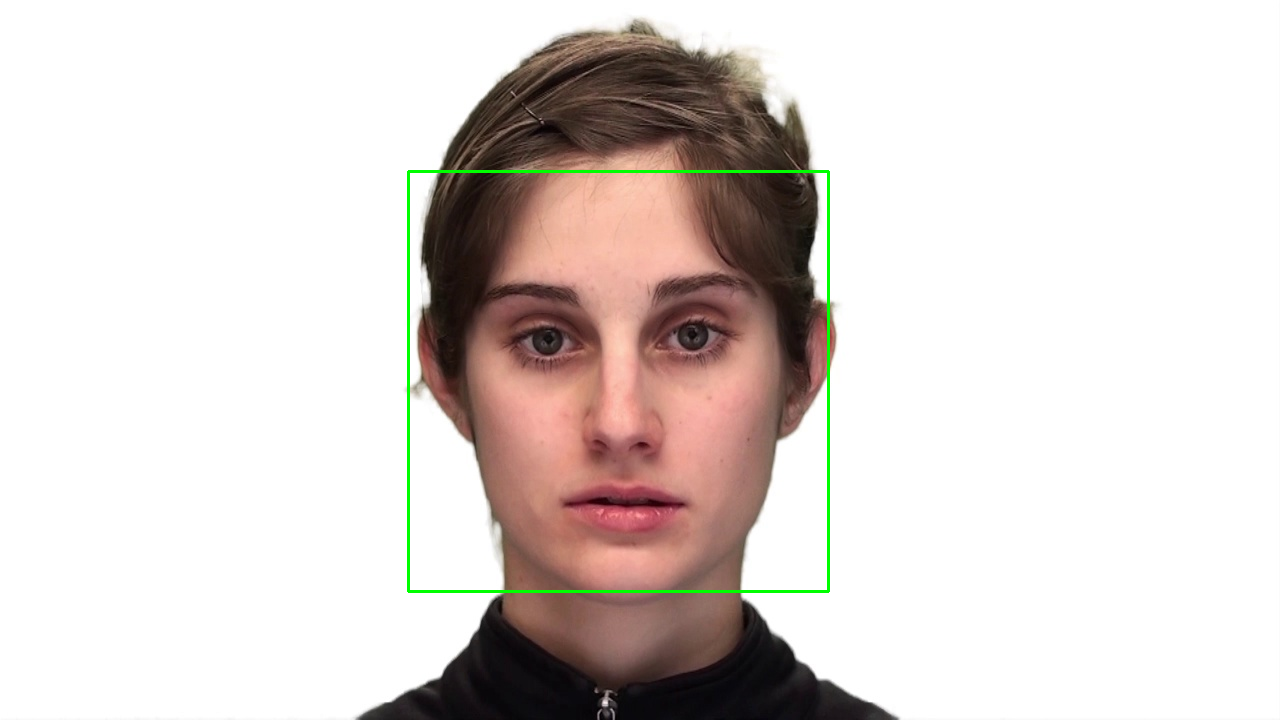

In [ ]:
from google.colab.patches import cv2_imshow
imagefaces ='/content/Images/faces'
for (x, y, w, h) in faces:
   cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 2)
   cv2_imshow(image)
   #cv2.imshow(image)
   #cv2.imwrite(i, imagefaces)
   #BoundImage.append(i)
   #print(BoundImage)

In [ ]:
try:
    # creating a folder named data
    if not os.path.exists('/content/Images/faces'):
        os.makedirs('/content/Images/faces')

# if not created then raise error
except OSError:
    print ('Error: Creating directory of faces')


In [ ]:

status = cv2.imwrite('faces_detected.jpg', image)

In [ ]:
print(status)

True


In [ ]:
pip install tqdm

In [ ]:
import glob as gb
s = 64
X_Image = []
#files = gb.glob(str( dataset_location + '/*.jpg'))
files = gb.glob(str('/content/faces_detected.jpg'))
for file in BoundImage:
        image = cv2.imread(file)
        image_array = cv2.resize(image , (s,s))
        X_Image.append(list(image_array))

SystemError: ignored

In [ ]:
#!/usr/bin/python
from PIL import Image
import os, sys

#path = "/root/Desktop/python/images/"
path = "/content/"
dirs = os.listdir( path )

def resize():
    for item in dirs:
        if os.path.isfile(path+item):
            im = Image.open(path+item)
            f, e = os.path.splitext(path+item)
            imResize = im.resize((64,64), Image.ANTIALIAS)
            imResize.save(f + ' resized.jpg', 'JPEG', quality=90)

resize()

In [ ]:
for i in actor_folders:
  for filename in os.listdir('/content/drive/MyDrive/ravdess/ravdess/' + i + '/*.mp4' ):
     print(file)
   # /content/drive/MyDrive/ravdess/ravdess/Actor_21/01-01-01-01-01-01-21.mp4

FileNotFoundError: ignored

In [ ]:
for i in actor_folders:
    filename = os.listdir(inputdir + i) #iterate over Actor folders
    for file in filename: # go through files in Actor folder
       if file.endswith(".mp4"):
         path=os.path.join("/content/drive/MyDrive/ravdess/ravdess/" + i + '/', str(file))
         print(path)
         images, frame_times = get_frames_from_video(file, STRIDE)
         frame_capture(path)

/content/drive/MyDrive/ravdess/ravdess/Actor_21/01-01-01-01-01-02-21.mp4
Creating..../Image/frame0.jpg
Creating..../Image/frame5.jpg


In [ ]:
print(images)

[]


In [ ]:
def get_frames_from_video(video_file, stride=1.0):
    """
    video_file - path to file
    stride - i.e 1.0 - extract frame every second, 0.5 - extract every 0.5 seconds
    return: list of images, list of frame times in seconds
    """
    video = cv2.VideoCapture(video_file)
    fps = video.get(cv2.CAP_PROP_FPS)
    i = 0.
    images = []
    frame_times = []

    while video.isOpened():
        ret, frame = video.read()
        if ret:
            images.append(frame)
            frame_times.append(i)
            i += stride
            video.set(1, round(i * fps))
        else:
            video.release()
            break
    return images, frame_times


def resize_if_necessary(image, max_size=1024):
    """
    if any spatial shape of image is greater
    than max_size, resize image such that max. spatial shape = max_size,
    otherwise return original image
    """
    if max_size is None:
        return image
    height, width = image.shape[:2]
    if max([height, width]) > max_size:
        ratio = float(max_size / max([height, width]))
        image = cv2.resize(image, (0, 0), fx=ratio, fy=ratio, interpolation=cv2.INTER_CUBIC)
    return image


In [ ]:

STRIDE = 1.0
MAX_IMAGE_SIZE = 64
#images, frame_times = get_frames_from_video('/content/drive/MyDrive/ravdess/ravdess/Actor_21/01-01-01-01-01-01-21.mp4', STRIDE)
images = [resize_if_necessary(image, MAX_IMAGE_SIZE) for image in images]

In [ ]:
import os
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(20,10))
columns = 5
for i, (image, frame_time) in enumerate(zip(images, frame_times)):
    plt.subplot(len(images) / columns + 1, columns, i + 1).set_title("Frame time: " + str(frame_time))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

<Figure size 1440x720 with 0 Axes>

In [ ]:
print(images)

[]



# Assignment 2/C
**Disclaimer: Only for ADL/AML students!**


You can **use only these** 3rd party **packages:** `cv2, keras, matplotlib, numpy, pandas, sklearn, skimage, tensorflow, librosa`.

### Description
In this notebook: building a multimodal deep neural network for emotion detection using tf.keras. You have to work with the RAVDESS dataset, which contains short (~4 seconds long) video clip recordings of speakers, who are acting the different emotions through 2 sentences. We will extract and combine RGB frames with MFCCs and utilize both video and audio information sources to achieve a better prediction.

### Use GPU
Runtime -> Change runtime type

At Hardware accelerator select  GPU then save it.  

### Useful shortcuts
* Run selected cell: *Ctrl + Enter*
* Insert cell below: *Ctrl + M B*
* Insert cell above: *Ctrl + M A*
* Convert to text: *Ctrl + M M*
* Split at cursor: *Ctrl + M -*
* Autocomplete: *Ctrl + Space* or *Tab*
* Move selected cells up: *Ctrl + M J*
* Move selected cells down: *Ctrl + M K*
* Delete selected cells: *Ctrl + M D*

If you have any question, feel free to ask.
fodorad201@gmail.com

## Prepare dataset

* Download the RAVDESS dataset. Here you can find more information about the dataset: https://zenodo.org/record/1188976#.X5g53OLPw2w
The dataset is available here as well: http://nipg1.inf.elte.hu:8765
ravdess.zip contains all of the mp4 clips. The labels are in the file names. (classification task)

* Preprocess the data.
  * Remove the silence parts from the beginning and the end of video clips. (Tips: ffmpeg filters)
  * Audio representation:
    * Extract the audio from the video. (Tips: ffmpeg)
    * Extract 24 Mel Frequency Cepstral Coefficients from the audio. (Tips: use librosa.)
    * Calculate the mean number of (spectral) frames in the dataset.
    * Standardize the MFCCs sample-wise. (Tips: zero mean and unit variance)
    * Use pre-padding (Note: with 0, which is also the mean after standardization) to unify the length of the samples.
    * Audio representation per sample is a tensor with shape (N,M,1) where N is the number of coefficients (e.g. 24) and M is the number of audio frames.
  * Visual representation:
    * Extract the faces from the images. (Tips: You can use the cv2.CascadeClassifier, or the DLIB package to determine facial keypoints, or MTCNN to predict bounding boxes.)
    * Resize the face images to 64x64. (Tips: You can use lower/higher resolution as well.)
    * Subsample the frames to reduce complexity (6 frames/video is enough).
    * Apply data augmentation, and scaling [0, 1].
    * Video representation per sample is a tensor with shape (F,H,W,3) where F is the number of frames (e.g. 6), H and W are the spatial dimensions (e.g. 64).
  * Ground truth labels:
    * There are 8 class labels. However, Class 1 (Neutral) and Class 2 (Calm) are almost the same. It is a commonly used practice to merge these two classes. Combine them to reduce complexity.
    * (Optional) Use one-hot-encoding with categorical_crossentropy loss later on, or keep them between [0, 6] and use sparse_categorical_crossentropy loss. It's up to you.

* Split the datasets into train-valid-test sets. Samples from the same speaker shouldn't appear in multiple sets. (Example split using speaker ids: 1-17: train set, 18-22: validation set, 23-24: test set)
* Create a generator, which iterates over the audio and visual representations. (Note: the generator should produce a tuple ([x0, x1], y), where x0 is the audio, x1 is the video representation, y is the ground truth.
* Print the size of each set, plot 3 samples: frames, MFCCs and their corresponding emotion class labels. (Tips: use librosa for plotting MFCCs)

Alternative considerations. They may require additional steps:
* You can use Mean (axis=1) MFCCs vectors to further reduce complexity. Input of the corresponding subnetwork should be modified to accept inputs with shape (N, 1).
* You can use log-melspectrograms as well. Note, that raw spectrograms are displaying power. Mel scale should be applied on the frequency axis, and log on the third dimension (decibels are expected). You can use librosa for that (librosa.feature.melspectrogram, librosa.power_to_db)
* A better evaluation procedure here is the LOO (Leave-One-Out) cross-validation, however it can be costy.

In [ ]:
# New model
from keras.layers.convolutional import Conv1D
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, LSTM, merge
from keras.layers import BatchNormalization
import tensorflow as tf
import numpy as np
from tensorflow.keras.layers import Conv1D, MaxPooling1D, SimpleRNN, Bidirectional, Input
from tensorflow.python.keras import Model, Sequential
def fcnet(input_size=(64, 64, 3)):
 model = Sequential()
 model.add(Conv1D(32, 3),input_shape=input_size,Activation('relu'))
 model.add(BatchNormalization())
 model.add(Activation('relu'))
 model.add(Conv1D(32, 3))
 model.add(BatchNormalization())
 model.add(Activation('relu'))
 model.add(Conv1D(64, 3))
 model.add(BatchNormalization())
 model.add(Activation('relu'))
 model.add(Dropout(0.25))
 model.add(Dense(128)) # Target class number
 model.add(Activation('relu'))
 model.summary()

ValueError: ignored

In [ ]:
output_length = 32

dropout = 0.5
lstm_dim = 256

In [ ]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.layers.embeddings import Embedding
from keras.layers.recurrent import LSTM
from keras.layers import Bidirectional, TimeDistributed
from keras.callbacks import EarlyStopping

def fcnet(input_size=(64, 64, 3)):
 model = Sequential()
 model.add(Bidirectional(LSTM(64), reset_selective = True))
 model.add(tf.keras.layers.Dropout(0.5))
 model.add(tf.keras.layers.Bidirectional(LSTM(64)))
 model.add(tf.keras.layers.Dense(units = 128, activation = 'relu'))
 model.add(Dense(units = 1, activation = 'softmax'))
 print(model.summary())

model = fcnet(input_size=(64, 64, 3))
model.summary()

TypeError: ignored

In [ ]:
token_num = 4000
data_length =100
model = Sequential()
model.add(Embedding(output_dim = output_length,
                    input_dim = token_num,
                    input_length = data_length))
model.add(Dropout(dropout))

# using BLSTM (this will be better than LSTM, Avg acc is around 0.85
model.add(Bidirectional(LSTM(lstm_dim), merge_mode = 'sum'))
model.add(Dropout(dropout))

# using LSTM, Avg acc is around 0.84
# model.add(LSTM(lstm_dim))
# model.add(Dropout(dropout))

model.add(Dense(units = 256, activation = 'relu'))
model.add(Dropout(dropout))

model.add(Dense(units = 1, activation = 'sigmoid'))
print(model.summary())

Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 32)           128000    
_________________________________________________________________
dropout_12 (Dropout)         (None, 100, 32)           0         
_________________________________________________________________
bidirectional (Bidirectional (None, 256)               591872    
_________________________________________________________________
dropout_13 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 256)               65792     
_________________________________________________________________
dropout_14 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 1)               

## Create Model

* Create the audio subnetwork
  * Choose one of these:
    * BLSTM (64 units, return sequences) + Dropout 0.5 + BLSTM (64 units) + Dense (128 units, ReLU)
    * Conv1D (32 filters, 3x3) + BatchNorm + ReLU, Conv1D (32 filters, 3x3) + BatchNorm + ReLU, Conv1D (64 filters, 3x3) + BatchNorm + ReLU, LSTM (64 units) + Dropout 0.5 + Dense (128 units, ReLU)
    * Conv2D (32 filters, 3x3) + BatchNorm + ReLU, MaxPool2D, Conv2D (32 filters, 3x3) + BatchNorm + ReLU, MaxPool2D, Flatten, Dense (128 units, ReLU)
  * You can try other configurations, better submodels. Have a reason for your choice!
* Create the visual subnetwork
  * Choose a visual backbone, which is applied frame-wise (Tips: use TimeDistributed Layer for this):
    * VGG-like architecture (Conv2D + MaxPooling blocks)
    * ResNet / Inception architecture (Residual blocks, Inception cells)
  * You can try other configurations, better submodels (like 3D convolution nets). Have a reason for your choice!
  * Apply Max pooling over the time dimension to reduce complexity (or use GRU or LSTM for better temporal modelling)
* Model fusion:
  * Concatenate the final hidden representations of the audio and visual subnetwork.
  * Apply fully connected layers on it (256 units, ReLU), then an another dense layer (7 units, softmax).
  * You can feed multiple inputs to the Model using a list:
  model = tf.keras.models.Model(inputs=[input_audio, input_video], outputs=output)

## Extra task (Optional)
Use the VGGFace2 model (and pretrained weights) in the visual subnetwork. It is trained on faces, so a much better representation can be obtained with it. Finetune the network for enhanced prediction.
(code: https://github.com/rcmalli/keras-vggface, but other implementation can be used as well)
Note, that this repository use the classic keras, while we are using tf.keras.
It may rise compatibility problems.

**If you can successfully use the VGGFace2 pretrained net, +1 is added to the final grade.**

## Additional notes

* Do the preprocessing steps offline, create pkl (or npy, hdf5, etc..) files, so you don't have to repeat most of the steps again. Then you can upload it, and train using colab without much struggling.
* Use Adam optimizer.
* Use learning rate scheduler.
* Check the training curve. If overfitting happens, add more regularization: weight decay (L2: 1e-3, 5e-4, etc...), Dropout

## Final steps, evaluation

* Plot the training / validation curve.
* Calculate accuracy, print a confusion matrix.